<a href="https://colab.research.google.com/github/CK705/Test1/blob/master/Nifty_50_LSTM_Model-Part-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

--- Data Collection and Preprocessing ---
Successfully downloaded data. Shape: (3680, 5)
Calculating technical indicators...
Technical indicators calculated.
Dropped 19 rows with NaN values after indicator calculation.
Remaining data shape: (3661, 10)
Features selected for scaling: ['Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Signal_Line']
Data scaled using MinMaxScaler.
Data split into training (2562 samples) and testing (1099 samples).
Creating sequences with a look-back window of 60 days...
x_train shape: (2502, 60, 6)
y_train shape: (2502,)
x_test shape: (1039, 60, 6)
y_test shape: (1039,)

--- Model Development ---
Model Architecture:



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)


--- Model Training and Saving ---
Model compiled with Adam optimizer and Mean Squared Error loss.
Training the model for 25 epochs with batch size 32...
Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0147 - val_loss: 9.4568e-04
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 7.3829e-04 - val_loss: 9.0777e-04
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 5.3536e-04 - val_loss: 8.9469e-04
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.3275e-04 - val_loss: 8.8246e-04
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 3.8049e-04 - val_loss: 9.4465e-04
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 3.8748e-04 - val_loss: 9.9072e-04
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 3.2340e-04 - val_loss: 9.0423e-04
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 3.0125e-04 - val_loss: 9.7447e-04
Epoch 9/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 2.7331e-04 - val_loss: 9.2493e-04
Epoch 10/

Model training finished.
Model saved successfully to nifty50_lstm_model.h5

--- Prediction and Visualization ---
Model loaded successfully from nifty50_lstm_model.h5.
Making predictions on the test set (1039 samples)...
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
Predictions finished.


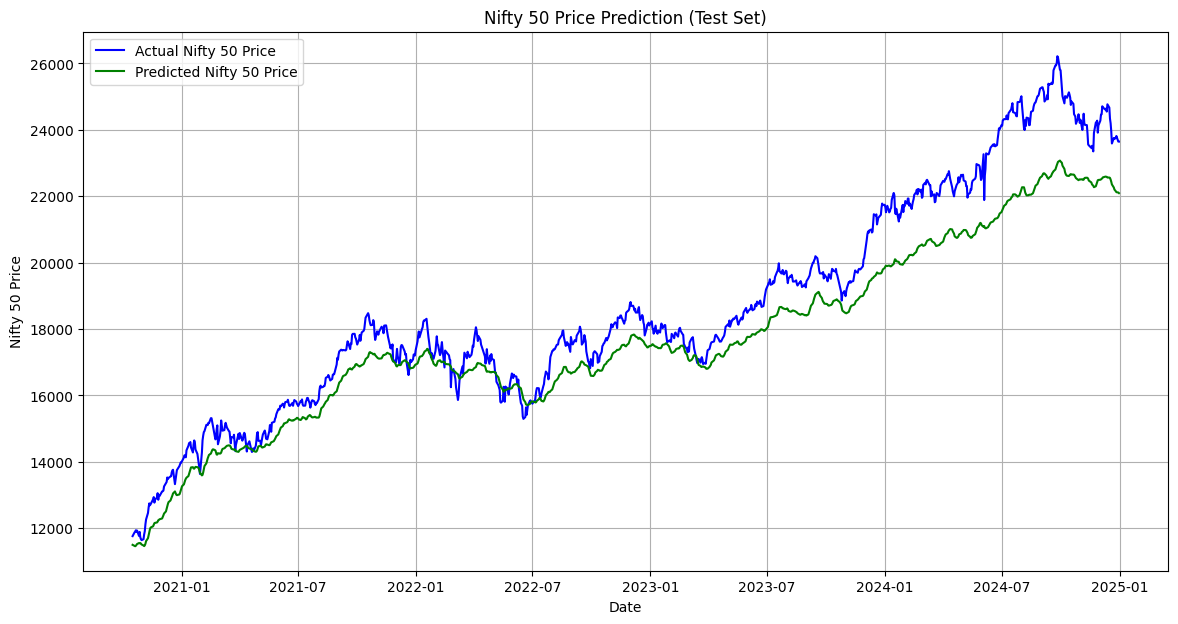

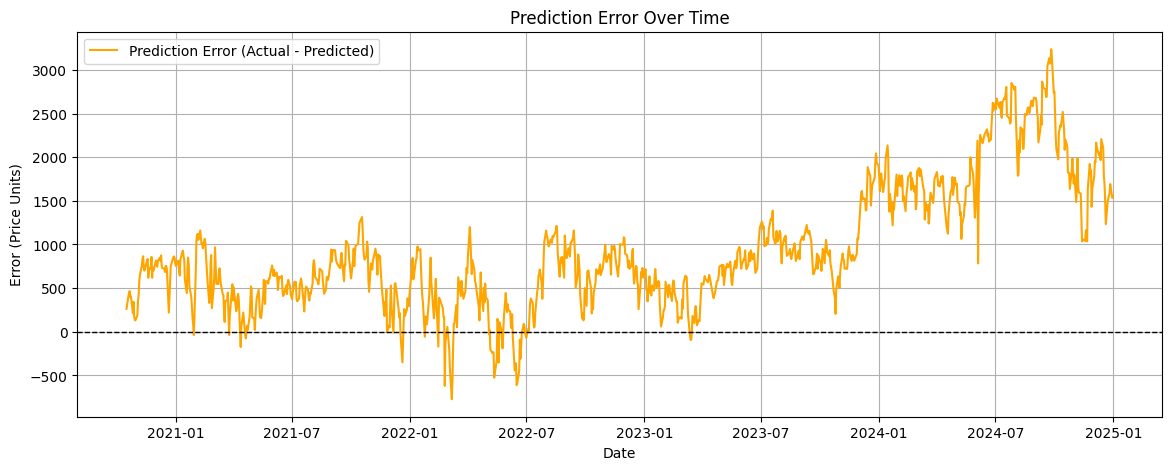


--- Evaluation Metrics ---
Mean Absolute Error (MAE): 951.95
Root Mean Squared Error (RMSE): 1170.22
R² Score: 0.8713
Mean Absolute Percentage Error (MAPE): 4.77%
Directional Accuracy (excluding no change days): 53.42%


In [8]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os # Import os module for checking file existence

# --- Section 6.1 Data Collection and Preprocessing ---

print("--- Data Collection and Preprocessing ---")

# Download Nifty 50 data
# Using a future end date to ensure data up to the report's context
ticker = "^NSEI"
start_date = "2010-01-01"
end_date = "2025-01-01"
print(f"Downloading {ticker} data from {start_date} to {end_date}...")
try:
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        print(f"Error: No data downloaded for {ticker}. Please check the ticker symbol and date range.")
        # Exit the script if data download fails
        exit()
    print(f"Successfully downloaded data. Shape: {data.shape}")
except Exception as e:
    print(f"Error downloading data: {e}")
    # Exit the script if data download fails
    exit()


# Calculate technical indicators
print("Calculating technical indicators...")
# Simple Moving Average (SMA)
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# Exponential Moving Average (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

# Relative Strength Index (RSI)
# Calculate price differences
delta = data['Close'].diff()
# Get gains (up) and losses (down)
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
# Calculate average gain and loss
avg_gain = gain.ewm(span=14, adjust=False).mean()
avg_loss = loss.ewm(span=14, adjust=False).mean()
# Calculate Relative Strength (RS)
# Handle division by zero in case avg_loss is zero
rs = np.where(avg_loss == 0, 0, avg_gain / avg_loss)
# Calculate RSI
data['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
# Calculate the 12-period EMA
ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
# Calculate the 26-period EMA
ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
# Calculate MACD line
data['MACD'] = ema_12 - ema_26
# Calculate the 9-period EMA of the MACD (Signal Line)
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

print("Technical indicators calculated.")

# Drop NaN values created by the rolling/ewm windows
initial_rows = len(data)
data = data.dropna()
rows_dropped = initial_rows - len(data)
print(f"Dropped {rows_dropped} rows with NaN values after indicator calculation.")
print(f"Remaining data shape: {data.shape}")

# Select features for scaling (Close and the calculated indicators)
features = ['Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'Signal_Line']
print(f"Features selected for scaling: {features}")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

# Convert scaled data back to a DataFrame with original index and columns
scaled_data = pd.DataFrame(scaled_data, columns=features, index=data.index)
print("Data scaled using MinMaxScaler.")

# Split into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
print(f"Data split into training ({len(train_data)} samples) and testing ({len(test_data)} samples).")

# Function to create sequences for LSTM
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    # Ensure there are enough samples to create at least one sequence and target
    if len(dataset) <= look_back:
        print(f"Warning: Dataset size ({len(dataset)}) is not sufficient for look_back period ({look_back}). Returning empty dataset.")
        return np.array(X), np.array(Y)

    for i in range(len(dataset) - look_back): # Corrected loop range
        a = dataset[i:(i + look_back), :] # all features for look_back days
        X.append(a)
        Y.append(dataset[i + look_back, 0]) # Close price on the next day (index 0 is 'Close')
    return np.array(X), np.array(Y)

# Prepare training and testing data with sequences
look_back = 60 # Define the look-back window size
print(f"Creating sequences with a look-back window of {look_back} days...")
# Convert dataframes to numpy arrays for sequence creation
train_data_np = train_data.values
test_data_np = test_data.values

x_train, y_train = create_dataset(train_data_np, look_back)
x_test, y_test = create_dataset(test_data_np, look_back)

# Reshape input to be [samples, time steps, features] - already handled by create_dataset
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


# --- Section 6.3 Model Development ---

print("\n--- Model Development ---")

# Define the LSTM model
model = Sequential()

# First LSTM layer with return_sequences=True to pass sequences to the next LSTM layer
# Input shape is (time steps, number of features)
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2)) # Adding dropout to prevent overfitting

# Second LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2)) # Adding dropout

# Output layer predicting the next day's closing price
model.add(Dense(units=1))

# Display model summary
print("Model Architecture:")
model.summary()

# --- Section 6.4 Model Training and Saving ---

print("\n--- Model Training and Saving ---")

# Assuming 'model', 'x_train', and 'y_train' are already defined and prepared

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print("Model compiled with Adam optimizer and Mean Squared Error loss.")

# Train the model
if x_train.shape[0] > 0:
    print(f"Training the model for {25} epochs with batch size {32}...")
    # Added validation_split to monitor performance on a subset of training data
    history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1) # verbose=1 to show progress
    print("Model training finished.")

    # Save the trained model
    model_filename = 'nifty50_lstm_model.h5'
    try:
        model.save(model_filename)
        print(f"Model saved successfully to {model_filename}")
    except Exception as e:
        print(f"Error saving the model: {e}")
else:
    print("Training data is empty. Skipping model training and saving.")


# --- Section 6.5 Prediction and Visualization ---

print("\n--- Prediction and Visualization ---")

model_filename = 'nifty50_lstm_model.h5'
# Load the trained model
if os.path.exists(model_filename):
    try:
        loaded_model = load_model(model_filename)
        print(f"Model loaded successfully from {model_filename}.")
    except Exception as e:
        print(f"Error loading the model: {e}")
        loaded_model = None # Set to None if loading fails
else:
    print(f"Model file '{model_filename}' not found. Skipping prediction and visualization.")
    loaded_model = None # Set to None if file not found


if loaded_model is not None and x_test.shape[0] > 0:
    # Make predictions on the test data
    print(f"Making predictions on the test set ({x_test.shape[0]} samples)...")
    predicted_prices_scaled = loaded_model.predict(x_test)
    print("Predictions finished.")

    # Inverse transform the scaled predictions to original price scale
    # Need to create a dummy array for other features as inverse_transform expects the original number of features
    # The predicted_prices_scaled is only the 'Close' price prediction
    # We concatenate the predicted 'Close' with zeros for the other features
    dummy_array = np.zeros((predicted_prices_scaled.shape[0], scaled_data.shape[1] - 1))
    predicted_prices_full = np.concatenate((predicted_prices_scaled, dummy_array), axis=1)
    predicted_prices = scaler.inverse_transform(predicted_prices_full)[:, 0] # Get the first column (Close price)

    # Inverse transform the actual test prices for comparison
    # Ensure y_test has the correct shape for concatenation
    if y_test.ndim == 1:
        y_test_reshaped = y_test.reshape(-1, 1)
    else:
        y_test_reshaped = y_test # Assume it's already in the correct shape

    actual_prices_full = np.concatenate((y_test_reshaped, dummy_array), axis=1)
    actual_prices = scaler.inverse_transform(actual_prices_full)[:, 0]

    # Get the corresponding dates for the test set predictions
    # The test set starts after the training set and the look_back period
    # Ensure there are enough dates in the original data corresponding to the test set predictions
    # The number of predictions is len(x_test), and these correspond to
    # data.index[train_size + look_back : train_size + look_back + len(x_test)]
    start_index = train_size + look_back
    end_index = start_index + len(x_test)
    # Ensure end_index does not exceed the total number of dates in the original data
    test_dates = data.index[start_index : min(end_index, len(data))]

    # Adjust actual and predicted prices length if test_dates is shorter
    actual_prices = actual_prices[:len(test_dates)]
    predicted_prices = predicted_prices[:len(test_dates)]

    # Plot actual vs predicted prices
    plt.figure(figsize=(14, 7))
    plt.plot(test_dates, actual_prices, color='blue', label='Actual Nifty 50 Price')
    plt.plot(test_dates, predicted_prices, color='green', label='Predicted Nifty 50 Price')
    plt.title('Nifty 50 Price Prediction (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Nifty 50 Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot prediction error over time
    errors = actual_prices - predicted_prices
    plt.figure(figsize=(14, 5))
    plt.plot(test_dates, errors, color='orange', label='Prediction Error (Actual - Predicted)')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.title('Prediction Error Over Time')
    plt.xlabel('Date')
    plt.ylabel('Error (Price Units)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Skipping prediction and visualization due to empty test data or model not loaded.")


# --- Results Section (Evaluation Metrics) ---

print("\n--- Evaluation Metrics ---")

# Assuming 'actual_prices' and 'predicted_prices' arrays are available from the prediction step
# Ensure actual_prices and predicted_prices are not empty before calculating metrics
if len(actual_prices) > 0 and len(predicted_prices) > 0 and len(actual_prices) == len(predicted_prices):
    # Mean Absolute Error (MAE): Average of the absolute differences between actual and predicted values.
    mae = mean_absolute_error(actual_prices, predicted_prices)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")

    # Root Mean Squared Error (RMSE): Square root of the average of squared differences. Gives more weight to larger errors.
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # R² Score (Coefficient of Determination): Indicates the proportion of the variance in the dependent variable (actual prices) that is predictable from the independent variables (model predictions). R² = 1 indicates perfect prediction.
    r2 = r2_score(actual_prices, predicted_prices)
    print(f"R² Score: {r2:.4f}")

    # Mean Absolute Percentage Error (MAPE): Average of the absolute percentage errors. Useful for understanding error relative to the actual price.
    # Avoid division by zero if actual_prices can be zero (unlikely for Nifty 50)
    # Use a small epsilon to prevent division by zero if any actual_price is exactly 0
    # Also handle cases where actual_prices might be very close to zero
    mape = np.mean(np.abs((actual_prices - predicted_prices) / (actual_prices + 1e-8))) * 100
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    # Directional Accuracy: Percentage of times the model correctly predicted the direction of the price movement (up or down) compared to the previous day.
    # Calculate the direction of movement for actual and predicted prices
    # Ensure there's more than one element to calculate diff
    if len(actual_prices) > 1:
        actual_direction = np.sign(np.diff(actual_prices))
        predicted_direction = np.sign(np.diff(predicted_prices))

        # Compare directions, ignoring the first element as diff reduces size by 1
        # Only compare where actual movement is not zero
        non_zero_actual_movement_indices = np.where(actual_direction != 0)[0]
        if len(non_zero_actual_movement_indices) > 0:
            correct_direction = np.sum(actual_direction[non_zero_actual_movement_indices] == predicted_direction[non_zero_actual_movement_indices])
            directional_accuracy = correct_direction / len(non_zero_actual_movement_indices)
            print(f"Directional Accuracy (excluding no change days): {directional_accuracy:.2%}")
        else:
             print("Directional Accuracy: No price movement in actual data to calculate directional accuracy.")

    else:
        print("Cannot calculate directional accuracy with less than 2 data points.")

else:
    print("Actual or predicted prices are empty or do not match in length. Cannot calculate evaluation metrics.")

